# Feature scaling

1. Standardization

2. Normalization ( Min Max Scaler)

3. Unit vector 

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# standardization

#  formula :  z_score = xi -mean /std

In [4]:
import numpy as np

In [5]:
mean = np.mean(df["total_bill"])

In [6]:
mean

19.78594262295082

In [7]:
std = np.std(df["total_bill"])

In [8]:
std

8.88415057777113

In [9]:
df["total_bill_standardized"] = df["total_bill"].apply(lambda x : (x-mean) / std)

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_standardized
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


<AxesSubplot: xlabel='total_bill', ylabel='Count'>

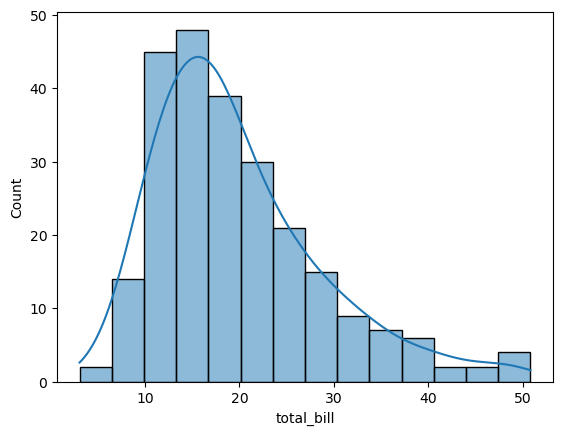

In [11]:
sns.histplot(df["total_bill"] , kde=True)

<AxesSubplot: xlabel='total_bill_standardized', ylabel='Count'>

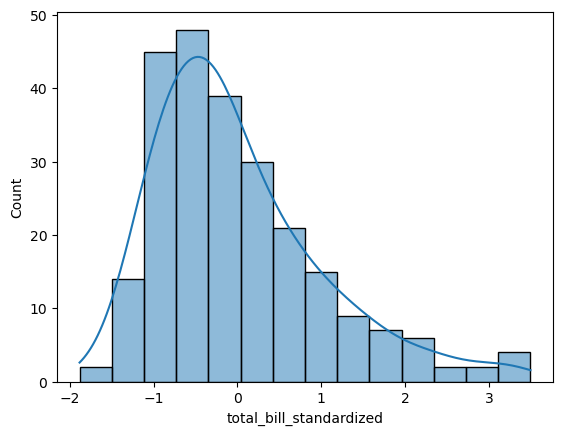

In [12]:
sns.histplot(df["total_bill_standardized"],kde=True)

In [13]:
#  another approach

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [25]:
scaler.fit(df[["total_bill"]])

StandardScaler()

In [26]:
df["modified_total_bill"] = scaler.transform(df[["total_bill"]])

In [23]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_standardized,modified_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745,0.540745


In [24]:
#  another one line code

In [18]:
df["scaled_total_bill"] = scaler.fit_transform(df[["total_bill"]])

In [19]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_standardized,scaled_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745,0.540745


In [20]:
#  we can also scaled two features at a  time

In [21]:
df[["scaled_bill" , "scaled_tip"]] = scaler.fit_transform(df[["total_bill","tip"]])

In [22]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_standardized,scaled_total_bill,scaled_bill,scaled_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711,-0.314711,-0.314711,-1.439947
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235,-1.063235,-1.063235,-0.969205
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780,0.137780,0.137780,0.363356
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315,0.438315,0.438315,0.225754
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745,0.540745,0.540745,0.443020


In [23]:
# now , if new data comes  ,  we can scale them bcs we have already set the model

In [24]:
scaler.transform([[13,4]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.76382571,  0.72546447]])

# Normalization - Min Max Scaler [0,1]

# formual :  (Xi - Xmin)/(Xmax - Xmin)

In [29]:
df =sns.load_dataset("taxis")

In [30]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
scaler.fit(df[["total"]])

MinMaxScaler()

In [34]:
df["scaled_total"] = scaler.transform(df[["total"]])

In [35]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,scaled_total
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,0.067139
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0.046104
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,0.074112
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,0.205452
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,0.069733


#  similary we can use fit_transform

#  similary we can scale two or more features at a time

# 3. Unit Vector 

In [38]:
from sklearn.preprocessing import normalize

In [40]:
df[["vector_total" , "vector_fare" , "vector_tip"]] = normalize(df[["total" , "fare" , "tip"]])

In [41]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,scaled_total,vector_total,vector_fare,vector_tip
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,0.067139,0.870471,0.470525,0.144518
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0.046104,0.880775,0.473535,0.000000
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,0.074112,0.874265,0.463064,0.145711
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,0.205452,0.800218,0.584733,0.133189
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,0.069733,0.828218,0.556266,0.067988
